In [18]:
# === Import Libraries and Load Data ===
import sys
import os
from importlib import reload
import utils.utils
from utils.wordcloud import generate_wordcloud
from utils.sentiment import analyze_sentiment, add_sentiment_to_dataframe
from utils.utils import tfa_df, marr_df, elmr_df, fake_df, true_df, nyt_df
from tokenizer.token_counter import TokenCounter

# Initialize with the default model
token_counter = TokenCounter(model_name="gpt-3.5-turbo")

reload(utils.utils)
reload(utils.wordcloud)
reload(utils.sentiment)

# Verify the datasets
# print("MARR DataFrame Sample:", marr_df.head())
# print("ELMR DataFrame Sample:", elmr_df.head())
# print("Fake DataFrame Sample:", fake_df.head())
# print("True DataFrame Sample:", true_df.head())
# print("TFA DataFrame Sample:", tfa_df.head())
# print("NYT DataFrame Sample:", nyt_df.head())

<module 'utils.sentiment' from '/Users/haigbedros/Desktop/MSDS/Capstone/CODE/ml-models-information-filtering/src/utils/sentiment.py'>

In [ ]:
# ======= tokinizer test ========
texts = ["This is the first sentence.", "Here is another one.", "And a third sentence."]
batch_counts = token_counter.count_batch(texts)
print(f"Batch Token Counts: {batch_counts}")

Batch Token Counts: [6, 5, 5]


In [ ]:
print(tfa_df.columns)

In [25]:
# === EDA on TFA DataFrame ===

# Count of columns
print("Number of Columns in TFA DataFrame:", len(tfa_df.columns))

# Initialize total word and token counts
total_word_count = 0
total_token_count = 0

# Word count and token count for all columns
for col in tfa_df.columns:
    if tfa_df[col].dtype == 'object':  # Process only text columns
        # Word count for the column
        column_word_count = tfa_df[col].dropna().apply(lambda x: len(str(x).split())).sum()
        total_word_count += column_word_count  # Accumulate word count
        print(f"Total Word Count in Column '{col}': {column_word_count}")
        
        # Token count for the column
        column_token_count = token_counter.total_tokens(tfa_df[col].dropna().astype(str).tolist())
        total_token_count += column_token_count  # Accumulate token count
        print(f"Total Token Count in Column '{col}': {column_token_count}")

# Print total word count and token count
print(f"\nTotal Word Count Across All Columns: {total_word_count}")
print(f"Total Token Count Across All Columns: {total_token_count}")

Number of Columns in TFA DataFrame: 55
Total Word Count in Column '_id': 5
Total Token Count in Column '_id': 65
Total Word Count in Column 'LinkedIn URL': 4
Total Token Count in Column 'LinkedIn URL': 57
Total Word Count in Column 'Country of Residence': 5
Total Token Count in Column 'Country of Residence': 15
Total Word Count in Column 'Have you studied a new degree during this past year?': 15
Total Token Count in Column 'Have you studied a new degree during this past year?': 32
Total Word Count in Column 'Highest diploma': 2
Total Token Count in Column 'Highest diploma': 21
Total Word Count in Column 'Last university attended': 3
Total Token Count in Column 'Last university attended': 5
Total Word Count in Column 'Last degree obtained': 3
Total Token Count in Column 'Last degree obtained': 30
Total Word Count in Column 'Have you worked during this past year?': 5
Total Token Count in Column 'Have you worked during this past year?': 40
Total Word Count in Column 'In what organization 

In [112]:
# === Descriptive Statistics ===
print("Descriptive Statistics for TFA DataFrame:")
print(tfa_df.describe(include='all'))

print("Descriptive Statistics for MARR DataFrame:")
print(marr_df.describe(include='all'))

print("Descriptive Statistics for ELMR DataFrame:")
print(elmr_df.describe(include='all'))

print("Descriptive Statistics for Fake News DataFrame:")
print(fake_df.describe(include='all'))

print("Descriptive Statistics for True News DataFrame:")
print(true_df.describe(include='all'))

# print("Descriptive Statistics for NYT DataFrame:")
# print(nyt_df.describe(include='all'))

Descriptive Statistics for TFA DataFrame:
                             _id LinkedIn URL Country of Residence  \
count                          5            4                    5   
unique                         5            4                    1   
top     67e09656e670d38eada1c773            -              Armenia   
freq                           1            1                    5   
mean                         NaN          NaN                  NaN   
std                          NaN          NaN                  NaN   
min                          NaN          NaN                  NaN   
25%                          NaN          NaN                  NaN   
50%                          NaN          NaN                  NaN   
75%                          NaN          NaN                  NaN   
max                          NaN          NaN                  NaN   

       Have you studied a new degree during this past year?  \
count                                                 

MARR DataFrame Sample:
                        _id                                    filename  \
0  67ef012fb79a5a82f4edd5b4  A Modern Approach to Regression with R.pdf   

                                                text      contentType  
0  springer texts statistics series editors g cas...  application/pdf  

Missing Values in MARR DataFrame:
_id            0
filename       0
text           0
contentType    0
dtype: int64

Total Word Count in MARR DataFrame: 61572
Total Token Count in MARR DataFrame: 75987

Generating Word Cloud for MARR DataFrame...


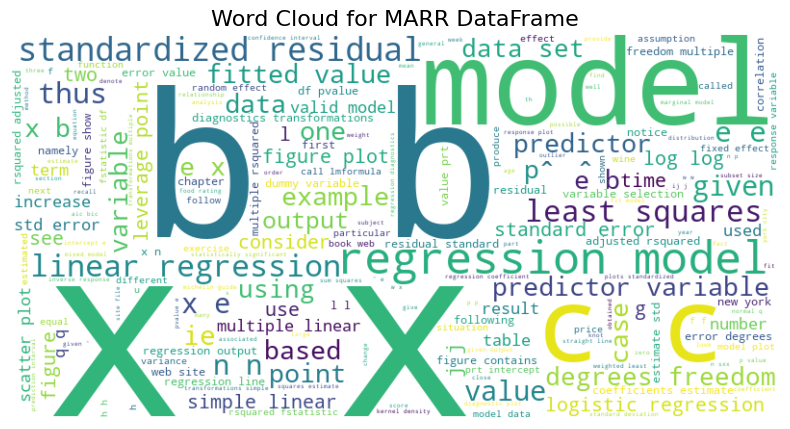


Performing Sentiment Analysis on MARR DataFrame...

Sentiment Analysis Results (First 5 Rows):
                                                text  polarity  subjectivity
0  springer texts statistics series editors g cas...  0.057595       0.38873


In [26]:
# === EDA on MARR DataFrame ===
print("MARR DataFrame Sample:")
print(marr_df.head())

# Check for missing values
print("\nMissing Values in MARR DataFrame:")
print(marr_df.isnull().sum())

# Perform word count, token count, generate word cloud, and sentiment analysis
if 'text' in marr_df.columns:
    # Concatenate all text in the 'text' column
    marr_full_text = ' '.join(marr_df['text'].dropna())
    
    # Perform word count
    marr_word_count = len(marr_full_text.split())
    print(f"\nTotal Word Count in MARR DataFrame: {marr_word_count}")
    
    # Perform token count
    marr_token_count = token_counter.total_tokens(marr_df['text'].dropna().tolist())
    print(f"Total Token Count in MARR DataFrame: {marr_token_count}")
    
    # Generate word cloud
    print("\nGenerating Word Cloud for MARR DataFrame...")
    generate_wordcloud(marr_full_text, title="Word Cloud for MARR DataFrame")
    
    # Perform sentiment analysis
    print("\nPerforming Sentiment Analysis on MARR DataFrame...")
    marr_df = add_sentiment_to_dataframe(marr_df, text_column='text')
    print("\nSentiment Analysis Results (First 5 Rows):")
    print(marr_df[['text', 'polarity', 'subjectivity']].head())
else:
    print("\nThe 'text' column does not exist in MARR DataFrame.")

ELMR DataFrame Sample:
                        _id                               filename  \
0  67eec821b79a5a82f4edd5ac  Extending the Linear Model with R.pdf   

                                                text      contentType  
0  chapman hallcrc texts statistical science seri...  application/pdf  

Missing Values in ELMR DataFrame:
_id            0
filename       0
text           0
contentType    0
dtype: int64

Total Word Count in ELMR DataFrame: 50362
Total Token Count in ELMR DataFrame: 64958

Generating Word Cloud for ELMR DataFrame...


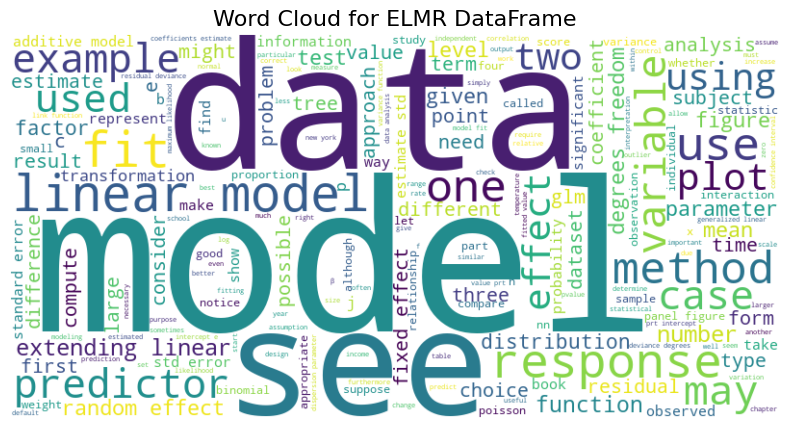


Performing Sentiment Analysis on ELMR DataFrame...

Sentiment Analysis Results (First 5 Rows):
                                                text  polarity  subjectivity
0  chapman hallcrc texts statistical science seri...  0.076041      0.418517


In [27]:
# === EDA on ELMR DataFrame ===
print("ELMR DataFrame Sample:")
print(elmr_df.head())

# Check for missing values
print("\nMissing Values in ELMR DataFrame:")
print(elmr_df.isnull().sum())

# Perform word count, token count, generate word cloud, and sentiment analysis
if 'text' in elmr_df.columns:
    # Concatenate all text in the 'text' column
    elmr_full_text = ' '.join(elmr_df['text'].dropna())
    
    # Perform word count
    elmr_word_count = len(elmr_full_text.split())
    print(f"\nTotal Word Count in ELMR DataFrame: {elmr_word_count}")
    
    # Perform token count
    elmr_token_count = token_counter.total_tokens(elmr_df['text'].dropna().tolist())
    print(f"Total Token Count in ELMR DataFrame: {elmr_token_count}")
    
    # Generate word cloud
    print("\nGenerating Word Cloud for ELMR DataFrame...")
    generate_wordcloud(elmr_full_text, title="Word Cloud for ELMR DataFrame")
    
    # Perform sentiment analysis
    print("\nPerforming Sentiment Analysis on ELMR DataFrame...")
    elmr_df = add_sentiment_to_dataframe(elmr_df, text_column='text')
    print("\nSentiment Analysis Results (First 5 Rows):")
    print(elmr_df[['text', 'polarity', 'subjectivity']].head())
else:
    print("\nThe 'text' column does not exist in ELMR DataFrame.")

Fake News DataFrame Sample:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  donald trump wish americans happy new year lea...    News   
1  house intelligence committee chairman devin nu...    News   
2  friday revealed former milwaukee sheriff david...    News   
3  christmas day donald trump announced would bac...    News   
4  pope francis used annual christmas day message...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

Missing Values in Fake News DataFrame:
title      0
text       0
subject    0
date       0
dtype: int64

Total 

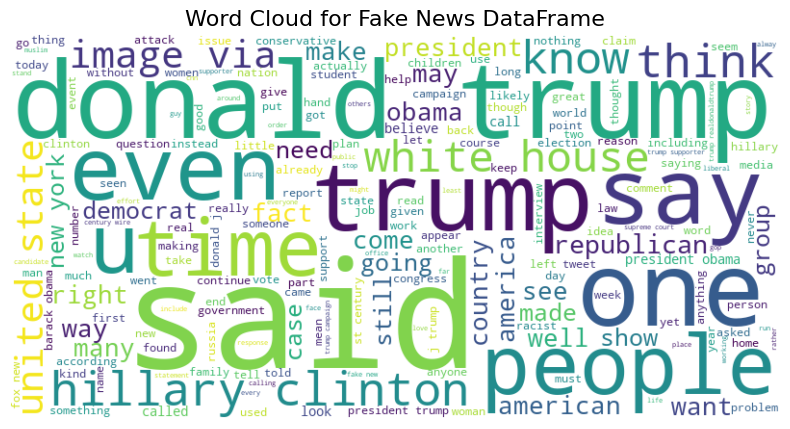


Performing Sentiment Analysis on Fake News DataFrame...

Sentiment Analysis Results (First 5 Rows):
                                                text  polarity  subjectivity
0  donald trump wish americans happy new year lea...  0.117708      0.615972
1  house intelligence committee chairman devin nu... -0.014112      0.337102
2  friday revealed former milwaukee sheriff david... -0.019491      0.538915
3  christmas day donald trump announced would bac...  0.018391      0.383333
4  pope francis used annual christmas day message... -0.000568      0.487121


In [28]:
# === EDA on Fake News DataFrame ===
print("Fake News DataFrame Sample:")
print(fake_df.head())

# Check for missing values
print("\nMissing Values in Fake News DataFrame:")
print(fake_df.isnull().sum())

# Perform word count, token count, generate word cloud, and sentiment analysis
if 'text' in fake_df.columns:
    # Concatenate all text in the 'text' column
    fake_full_text = ' '.join(fake_df['text'].dropna())
    
    # Perform word count
    fake_word_count = len(fake_full_text.split())
    print(f"\nTotal Word Count in Fake News DataFrame: {fake_word_count}")
    
    # Perform token count
    fake_token_count = token_counter.total_tokens(fake_df['text'].dropna().tolist())
    print(f"Total Token Count in Fake News DataFrame: {fake_token_count}")
    
    # Generate word cloud
    print("\nGenerating Word Cloud for Fake News DataFrame...")
    generate_wordcloud(fake_full_text, title="Word Cloud for Fake News DataFrame")
    
    # Perform sentiment analysis
    print("\nPerforming Sentiment Analysis on Fake News DataFrame...")
    fake_df = add_sentiment_to_dataframe(fake_df, text_column='text')
    print("\nSentiment Analysis Results (First 5 Rows):")
    print(fake_df[['text', 'polarity', 'subjectivity']].head())
else:
    print("\nThe 'text' column does not exist in Fake News DataFrame.")

True News DataFrame Sample:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  washington reuters head conservative republica...  politicsNews   
1  washington reuters transgender people allowed ...  politicsNews   
2  washington reuters special counsel investigati...  politicsNews   
3  washington reuters trump campaign adviser geor...  politicsNews   
4  seattlewashington reuters president donald tru...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Missing Values in True News DataFrame:
title      0
text       0
subj

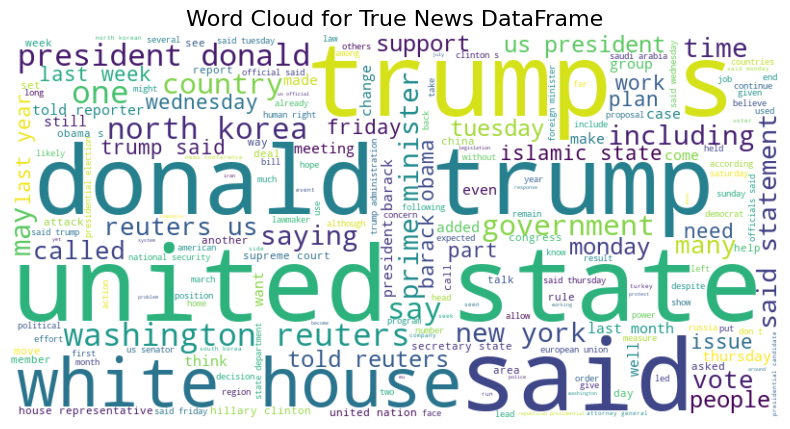


Performing Sentiment Analysis on True News DataFrame...

Sentiment Analysis Results (First 5 Rows):
                                                text  polarity  subjectivity
0  washington reuters head conservative republica...  0.036979      0.403438
1  washington reuters transgender people allowed ...  0.113095      0.296168
2  washington reuters special counsel investigati...  0.129766      0.311252
3  washington reuters trump campaign adviser geor...  0.030305      0.276323
4  seattlewashington reuters president donald tru...  0.042130      0.379259


In [30]:
# === EDA on True News DataFrame ===
print("True News DataFrame Sample:")
print(true_df.head())

# Check for missing values
print("\nMissing Values in True News DataFrame:")
print(true_df.isnull().sum())

# Perform word count, token count, generate word cloud, and sentiment analysis
if 'text' in true_df.columns:
    # Concatenate all text in the 'text' column
    true_full_text = ' '.join(true_df['text'].dropna())
    
    # Perform word count
    true_word_count = len(true_full_text.split())
    print(f"\nTotal Word Count in True News DataFrame: {true_word_count}")
    
    # Perform token count
    true_token_count = token_counter.total_tokens(true_df['text'].dropna().tolist())
    print(f"Total Token Count in True News DataFrame: {true_token_count}")
    
    # Generate word cloud
    print("\nGenerating Word Cloud for True News DataFrame...")
    generate_wordcloud(true_full_text, title="Word Cloud for True News DataFrame")
    
    # Perform sentiment analysis
    print("\nPerforming Sentiment Analysis on True News DataFrame...")
    true_df = add_sentiment_to_dataframe(true_df, text_column='text')
    print("\nSentiment Analysis Results (First 5 Rows):")
    print(true_df[['text', 'polarity', 'subjectivity']].head())
else:
    print("\nThe 'text' column does not exist in True News DataFrame.")

In [ ]:
'''
# === EDA on NYT DataFrame ===
print("NYT DataFrame Sample:")
print(nyt_df.head())

# Example: Check for missing values
print("Missing Values in NYT DataFrame:")
print(nyt_df.isnull().sum())

# Example: Perform word count on concatenated text
nyt_full_text = ' '.join(nyt_df['text'].dropna())
nyt_word_count = len(nyt_full_text.split())
print(f"Total Word Count in NYT Text: {nyt_word_count}")'
'''

In [ ]:
# === Text Length Distribution ===
import matplotlib.pyplot as plt

def plot_text_length_distribution(df, title):
    text_lengths = df['text'].dropna().apply(len)
    plt.hist(text_lengths, bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plot_text_length_distribution(tfa_df, 'TFA Text Length Distribution')
plot_text_length_distribution(marr_df, 'MARR Text Length Distribution')
plot_text_length_distribution(elmr_df, 'ELMR Text Length Distribution')
plot_text_length_distribution(fake_df, 'Fake News Text Length Distribution')
plot_text_length_distribution(true_df, 'True News Text Length Distribution')
# plot_text_length_distribution(nyt_df, 'NYT Text Length Distribution')

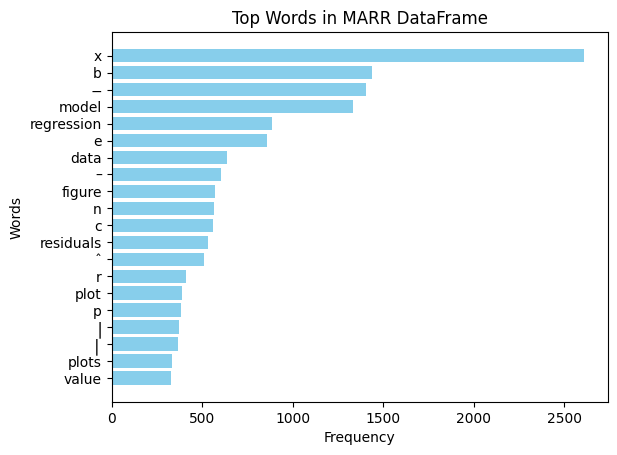

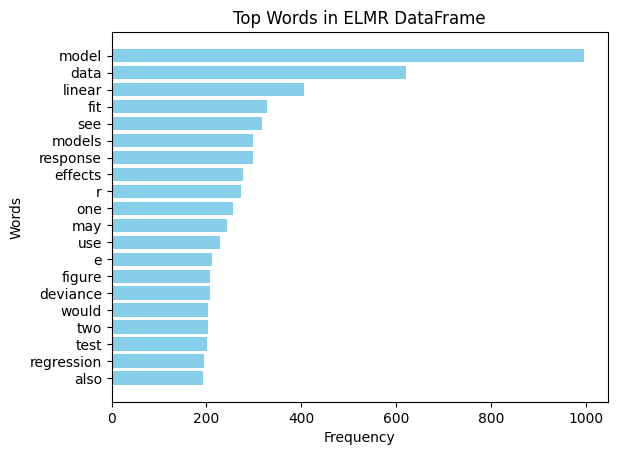

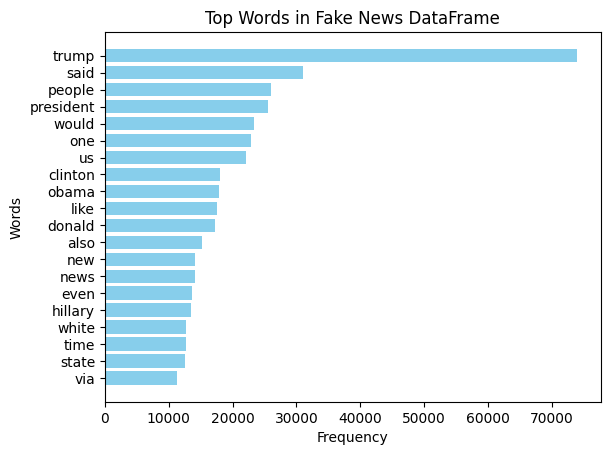

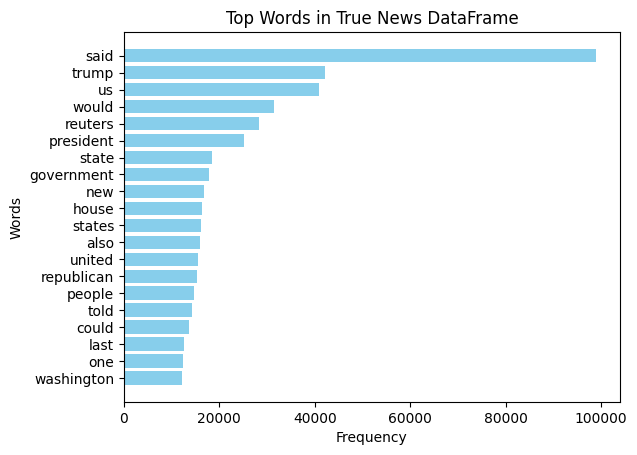

In [29]:
# === Word Frequency Analysis ===
from collections import Counter

def plot_word_frequency(df, title, top_n=20):
    all_words = ' '.join(df['text'].dropna()).split()
    word_counts = Counter(all_words).most_common(top_n)
    words, counts = zip(*word_counts)
    plt.barh(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.gca().invert_yaxis()
    plt.show()

# plot_word_frequency(tfa_df, 'Top Words in TFA DataFrame')
plot_word_frequency(marr_df, 'Top Words in MARR DataFrame')
plot_word_frequency(elmr_df, 'Top Words in ELMR DataFrame')
plot_word_frequency(fake_df, 'Top Words in Fake News DataFrame')
plot_word_frequency(true_df, 'Top Words in True News DataFrame')
# plot_word_frequency(nyt_df, 'Top Words in NYT DataFrame')

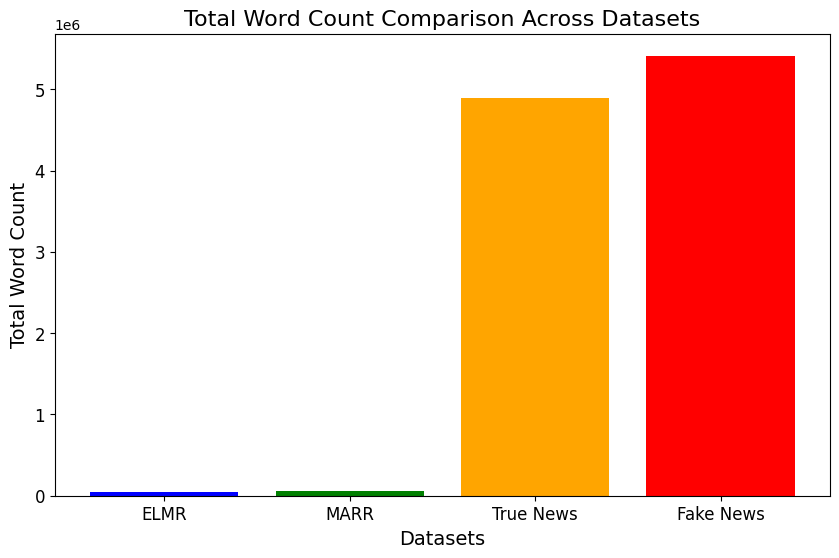

In [8]:
import matplotlib.pyplot as plt

# Calculate total word count for each DataFrame
datasets = ['ELMR', 'MARR', 'True News', 'Fake News']
word_counts = [
    len(' '.join(elmr_df['text'].dropna()).split()) if 'text' in elmr_df.columns else 0,
    len(' '.join(marr_df['text'].dropna()).split()) if 'text' in marr_df.columns else 0,
    len(' '.join(true_df['text'].dropna()).split()) if 'text' in true_df.columns else 0,
    len(' '.join(fake_df['text'].dropna()).split()) if 'text' in fake_df.columns else 0
]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(datasets, word_counts, color=['blue', 'green', 'orange', 'red'])
plt.title('Total Word Count Comparison Across Datasets', fontsize=16)
plt.xlabel('Datasets', fontsize=14)
plt.ylabel('Total Word Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Generating Combined Word Cloud for ELMR and MARR Datasets...


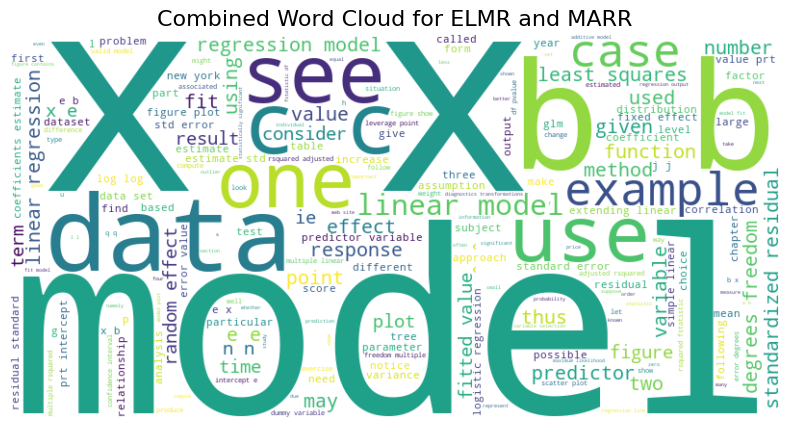

In [9]:
# Combine text from ELMR and MARR datasets
elmr_marr_text = ' '.join(elmr_df['text'].dropna()) + ' ' + ' '.join(marr_df['text'].dropna())

# Generate word cloud
print("\nGenerating Combined Word Cloud for ELMR and MARR Datasets...")
generate_wordcloud(elmr_marr_text, title="Combined Word Cloud for ELMR and MARR")


Generating Combined Word Cloud for True and Fake News Datasets...


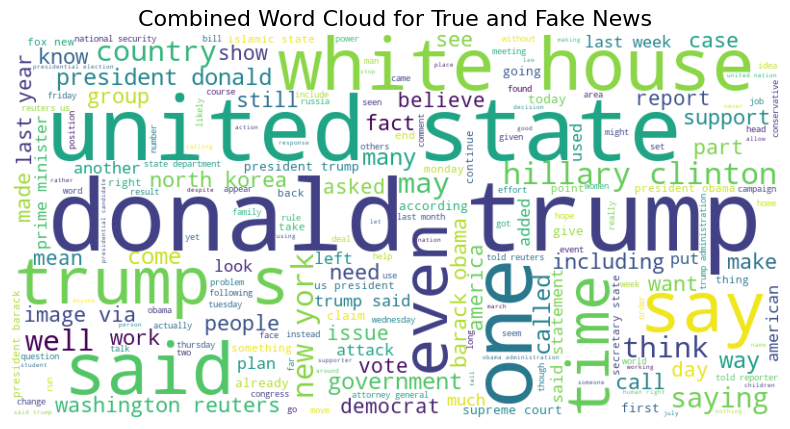

In [10]:
# Combine text from True and Fake News datasets
true_fake_text = ' '.join(true_df['text'].dropna()) + ' ' + ' '.join(fake_df['text'].dropna())

# Generate word cloud
print("\nGenerating Combined Word Cloud for True and Fake News Datasets...")
generate_wordcloud(true_fake_text, title="Combined Word Cloud for True and Fake News")

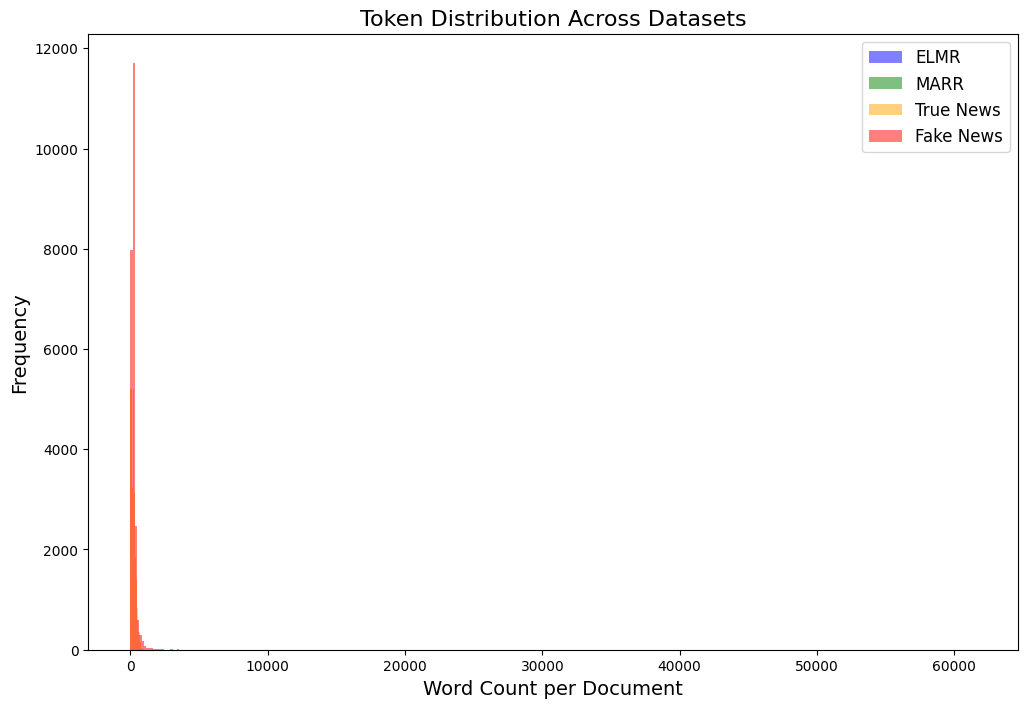

In [11]:
# Calculate word counts for each row in the datasets
elmr_word_counts = elmr_df['text'].dropna().apply(lambda x: len(x.split())) if 'text' in elmr_df.columns else []
marr_word_counts = marr_df['text'].dropna().apply(lambda x: len(x.split())) if 'text' in marr_df.columns else []
true_word_counts = true_df['text'].dropna().apply(lambda x: len(x.split())) if 'text' in true_df.columns else []
fake_word_counts = fake_df['text'].dropna().apply(lambda x: len(x.split())) if 'text' in fake_df.columns else []

# Plot histograms
plt.figure(figsize=(12, 8))
plt.hist(elmr_word_counts, bins=30, alpha=0.5, label='ELMR', color='blue')
plt.hist(marr_word_counts, bins=30, alpha=0.5, label='MARR', color='green')
plt.hist(true_word_counts, bins=30, alpha=0.5, label='True News', color='orange')
plt.hist(fake_word_counts, bins=30, alpha=0.5, label='Fake News', color='red')
plt.title('Token Distribution Across Datasets', fontsize=16)
plt.xlabel('Word Count per Document', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.show()

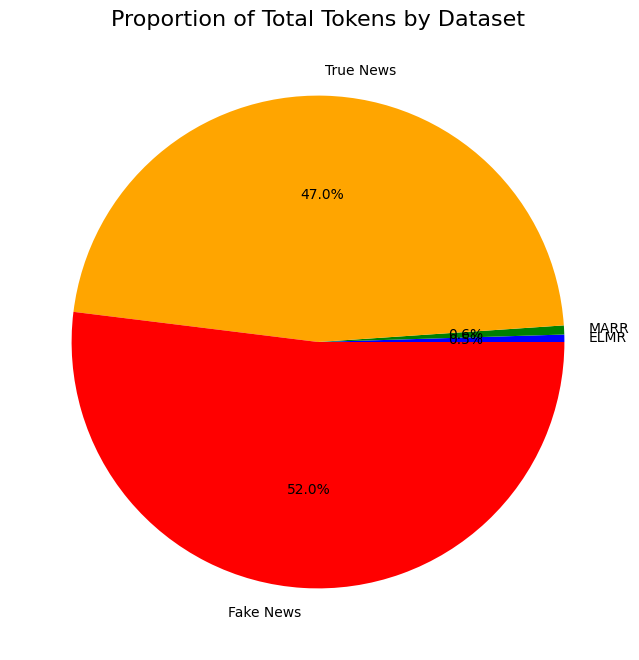

In [14]:
# Calculate total word count for each dataset
total_tokens = sum(word_counts)
proportions = [count / total_tokens for count in word_counts]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=datasets, autopct='%1.1f%%', colors=['blue', 'green', 'orange', 'red'])
plt.title('Proportion of Total Tokens by Dataset', fontsize=16)
plt.show()